In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [2]:
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.shape

(13580, 21)

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

C:\Users\Razi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


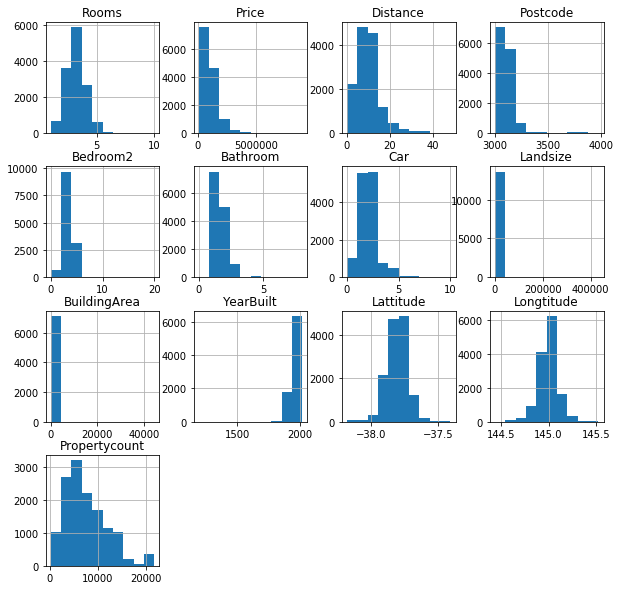

In [6]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

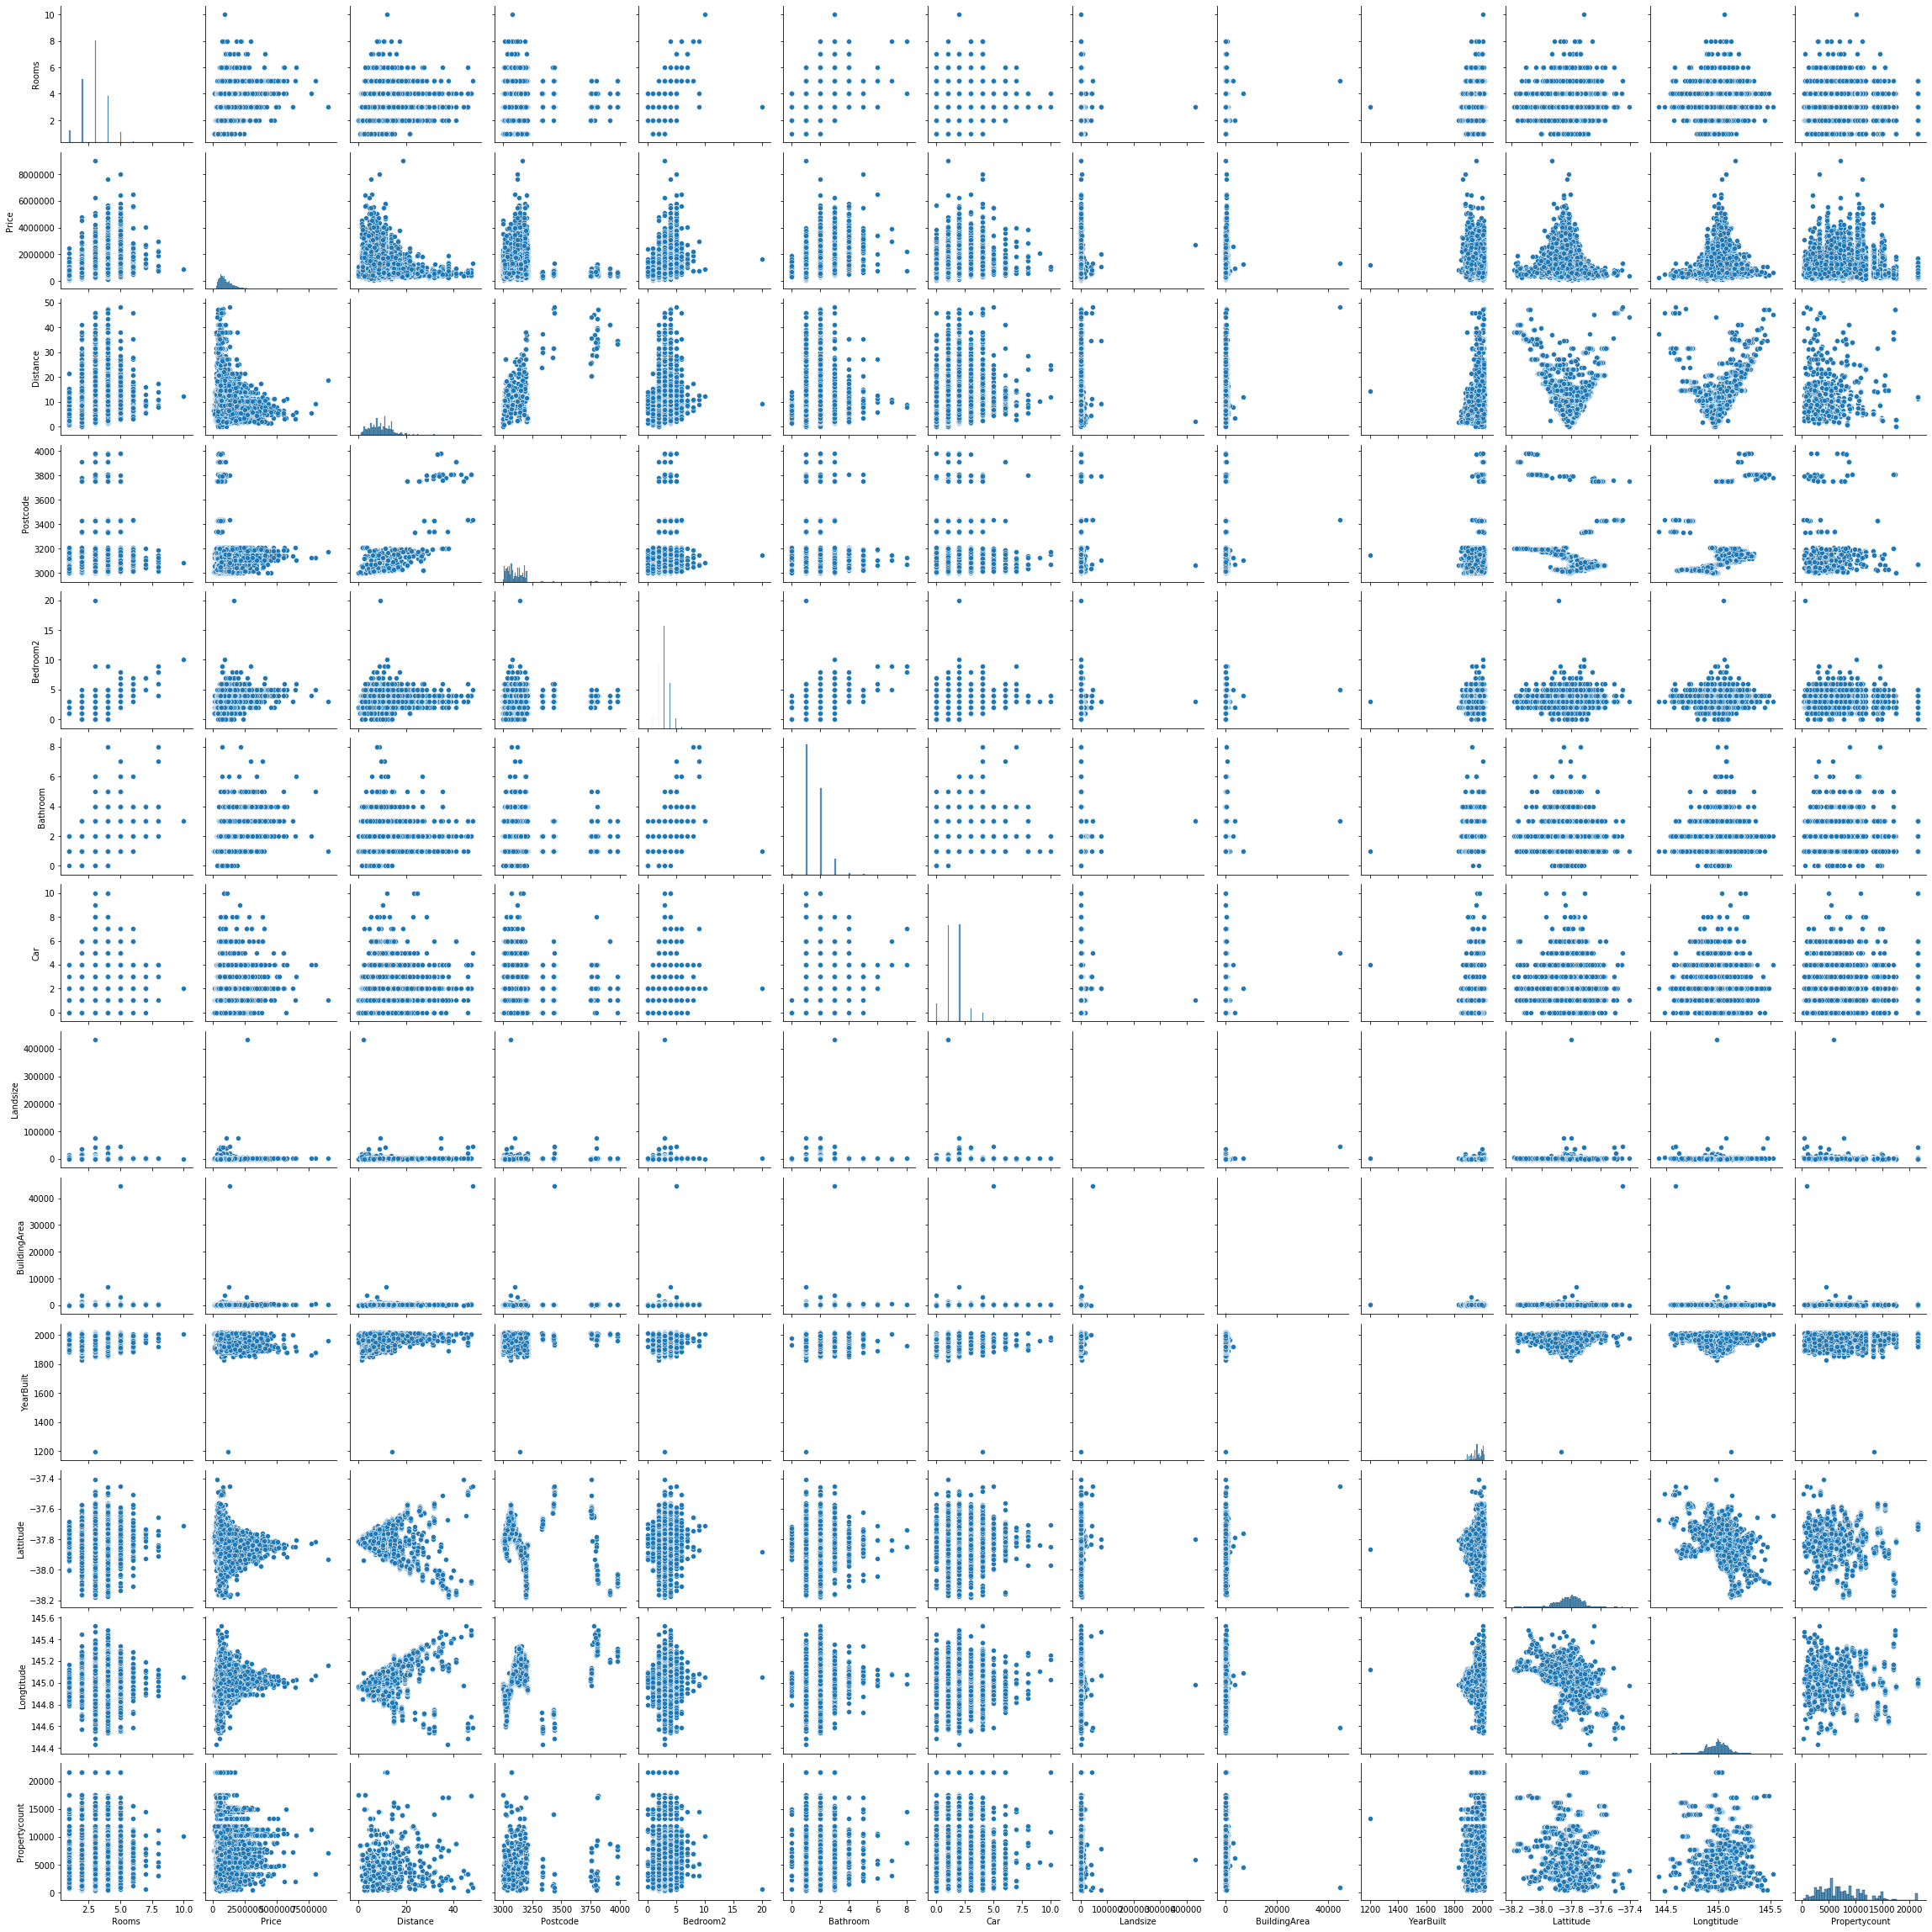

In [7]:
sns.pairplot(df)

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


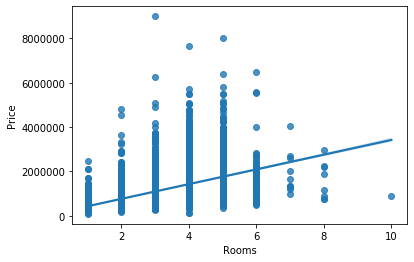

In [8]:
sns.regplot("Rooms", "Price", data=df)

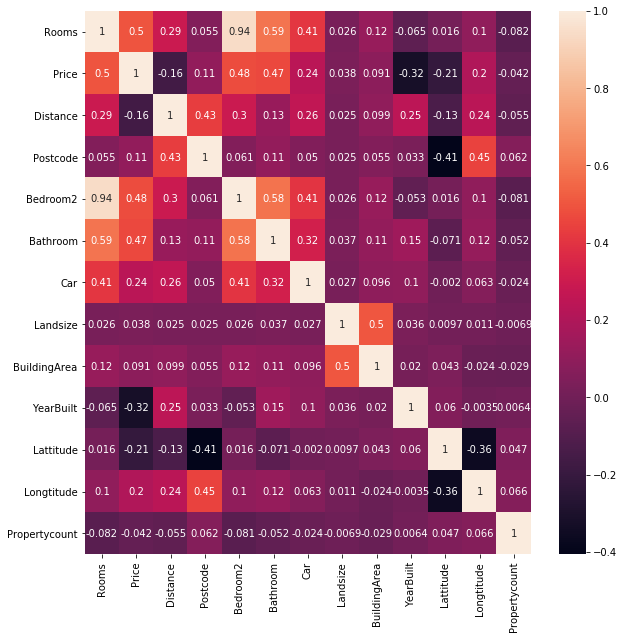

In [9]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


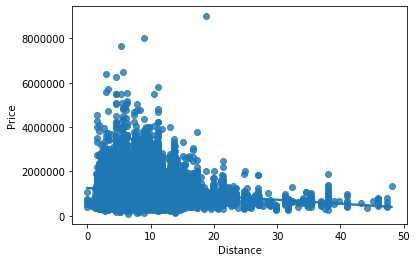

In [10]:
sns.regplot("Distance", "Price", data=df)

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


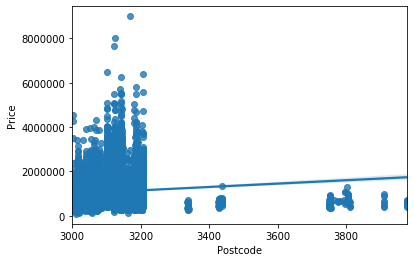

In [11]:
sns.regplot("Postcode", "Price", data=df)

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


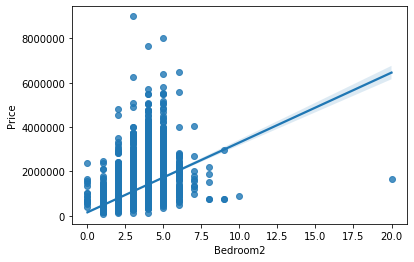

In [12]:
sns.regplot("Bedroom2", "Price", data=df)

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


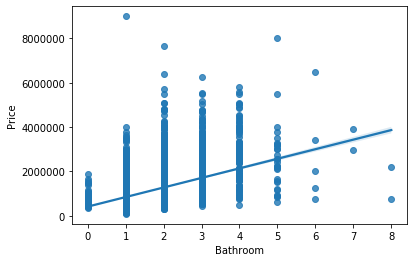

In [13]:
sns.regplot("Bathroom", "Price", data=df)

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


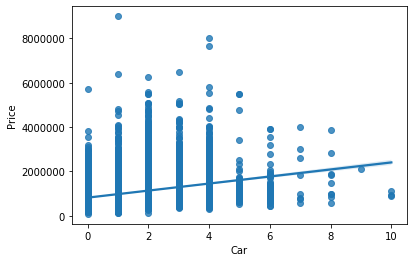

In [14]:
sns.regplot("Car", "Price", data=df)

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


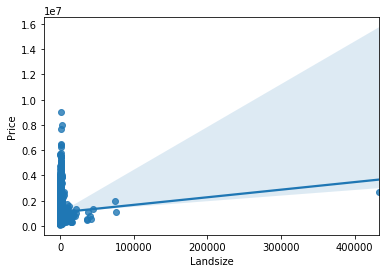

In [15]:
sns.regplot("Landsize", "Price", data=df)

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


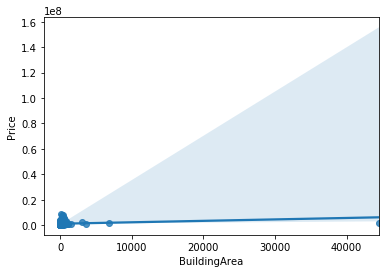

In [16]:
sns.regplot("BuildingArea", "Price", data=df)

C:\Users\Razi\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


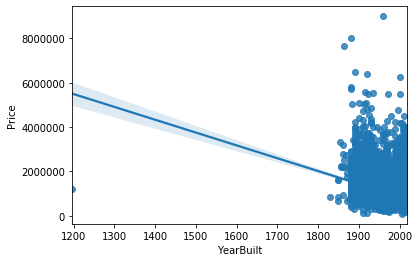

In [17]:
sns.regplot("YearBuilt", "Price", data=df)

In [18]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [19]:
df["Car"] = df["Car"].replace(np.nan, df["Car"].mean())

In [20]:
df["YearBuilt"] = df["YearBuilt"].replace(np.nan, df["YearBuilt"].median())

In [21]:
df["BuildingArea"] = df["BuildingArea"].replace(np.nan, df["BuildingArea"].mean())

In [22]:
df.drop("CouncilArea", axis=1, inplace=True)

In [23]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [24]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [25]:
char_features = [col for col in df.columns if df[col].dtypes=="object"]
print(char_features)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname']


In [26]:
df["Suburb"].value_counts()

Reservoir         359
Richmond          260
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Yarra Glen          1
Rockbank            1
Sandhurst           1
New Gisborne        1
Wallan              1
Name: Suburb, Length: 314, dtype: int64

In [27]:
df.drop("Suburb", axis=1, inplace=True)

In [28]:
df["Address"].value_counts()

53 William St          3
13 Robinson St         3
28 Blair St            3
1/1 Clarendon St       3
36 Aberfeldie St       3
                      ..
5 Robin Ct             1
107/480 Albion St      1
10 Sedge Cl            1
56 Pecham St           1
3/68 Northernhay St    1
Name: Address, Length: 13378, dtype: int64

In [29]:
df.drop("Address", axis=1, inplace=True)

In [30]:
df["Type"].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [31]:
df["Method"].value_counts()

S     9022
SP    1703
PI    1564
VB    1199
SA      92
Name: Method, dtype: int64

In [32]:
df["SellerG"].value_counts()

Nelson           1565
Jellis           1316
hockingstuart    1167
Barry            1011
Ray               701
                 ... 
Nicholls            1
Craig               1
Property            1
Direct              1
Xynergy             1
Name: SellerG, Length: 268, dtype: int64

In [33]:
df["Date"].value_counts()

27/05/2017    473
3/06/2017     395
12/08/2017    387
17/06/2017    374
27/11/2016    362
29/07/2017    341
4/03/2017     337
25/02/2017    333
24/06/2017    329
10/12/2016    319
22/07/2017    317
8/07/2017     310
18/03/2017    303
15/10/2016    300
15/07/2017    292
12/11/2016    292
3/12/2016     288
8/04/2017     280
1/07/2017     276
19/11/2016    266
20/05/2017    262
18/06/2016    261
28/05/2016    258
13/05/2017    255
16/09/2017    254
8/10/2016     251
23/09/2017    247
26/08/2017    246
7/05/2016     245
17/09/2016    242
24/09/2016    240
28/08/2016    238
10/09/2016    235
16/04/2016    217
29/04/2017    217
3/09/2017     214
4/06/2016     214
27/06/2016    211
3/09/2016     208
9/09/2017     205
22/05/2016    203
19/08/2017    201
7/11/2016     194
14/05/2016    193
22/08/2016    192
30/07/2016    172
6/08/2016     154
16/07/2016    141
6/05/2017     140
22/04/2017    134
26/07/2016    133
13/08/2016    132
23/04/2016    101
11/02/2017     84
12/06/2016     46
11/03/2017

In [34]:
df.drop("Date", axis=1, inplace=True)

In [35]:
df["Regionname"].value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [36]:
df.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [37]:
df.shape

(13580, 17)

In [38]:
df.reset_index

<bound method DataFrame.reset_index of        Rooms Type      Price Method   SellerG  Distance  Postcode  Bedroom2  \
0          2    h  1480000.0      S    Biggin       2.5    3067.0       2.0   
1          2    h  1035000.0      S    Biggin       2.5    3067.0       2.0   
2          3    h  1465000.0     SP    Biggin       2.5    3067.0       3.0   
3          3    h   850000.0     PI    Biggin       2.5    3067.0       3.0   
4          4    h  1600000.0     VB    Nelson       2.5    3067.0       3.0   
...      ...  ...        ...    ...       ...       ...       ...       ...   
13575      4    h  1245000.0      S     Barry      16.7    3150.0       4.0   
13576      3    h  1031000.0     SP  Williams       6.8    3016.0       3.0   
13577      3    h  1170000.0      S     Raine       6.8    3016.0       3.0   
13578      4    h  2500000.0     PI   Sweeney       6.8    3016.0       4.0   
13579      4    h  1285000.0     SP   Village       6.3    3013.0       4.0   

       Bathr

In [39]:
df.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [40]:
char_features = [col for col in df.columns if df[col].dtypes=="object"]
print(char_features)

['Type', 'Method', 'SellerG', 'Regionname']


In [41]:
num_features = [col for col in df.columns if df[col].dtypes in ("float64", "int64")]
print(num_features)

['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [42]:
df.drop(["Lattitude", "Longtitude"], axis=1, inplace=True)

In [43]:
num_features = [col for col in df.columns if df[col].dtypes in ("float64", "int64")]
print(num_features)

['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']


In [44]:
num_feature = ["Rooms", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "YearBuilt"]

In [45]:
df.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1970.0,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.0,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.0,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1970.0,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.0,Northern Metropolitan,4019.0


In [46]:
df.shape

(13580, 15)

In [47]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (9506, 14)
X_test: (4074, 14)
y_train: (9506,)
y_test: (4074,)


In [49]:
char_pipeline = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])
num_pipeline = Pipeline(steps=[("scaler", MinMaxScaler())])

preprocessor = ColumnTransformer(transformers=[("chat", char_pipeline, char_features), ("num", num_pipeline, num_feature)])

In [50]:
lin_reg = LinearRegression()

In [51]:
my_pipeline = Pipeline(steps=[("preprocessing", preprocessor), ("model", lin_reg)])
my_pipeline.fit(X_train, y_train)
y_pred = my_pipeline.predict(X_test)

In [52]:
score = r2_score(y_test, y_pred)
print(score)

0.5932335176029326


<H3>Improving the Model

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=300, learning_rate=0.1)

In [54]:
my_pipeline_gbrt = Pipeline(steps=[("preprocessing", preprocessor), ("model_gbrt", gbrt)])
my_pipeline_gbrt.fit(X_train, y_train)
y_pred_gbrt = my_pipeline_gbrt.predict(X_test)

In [55]:
score = r2_score(y_test, y_pred_gbrt)
print(score)

0.7401785168823558


<h3>Hyper Parameter Tunning

In [64]:
from sklearn.model_selection import GridSearchCV

params = [
    {
        "model_gbrt_cv__max_depth": [5, 6, 7, 8],
        "model_gbrt_cv__n_estimators": [300, 350],
        "model_gbrt_cv__learning_rate": [0.01, 0.05, 0.1, 1.0]
    }
]

In [65]:
gbrt_cv = GradientBoostingRegressor()
my_pipeline_gbrt_cv = Pipeline(steps=[("preprocessing", preprocessor), ("model_gbrt_cv", gbrt_cv)])
grid_search = GridSearchCV(my_pipeline_gbrt_cv, params)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('chat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('onehot',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                                  

In [66]:
grid_search.best_params_

{'model_gbrt_cv__learning_rate': 0.1,
 'model_gbrt_cv__max_depth': 6,
 'model_gbrt_cv__n_estimators': 350}

In [67]:
y_pred_best_estimator = grid_search.best_estimator_.predict(X_test)
score_cv = r2_score(y_test, y_pred_best_estimator)
print(score_cv)

0.748886727483657
